# 0. 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

# 숫자 전체 표현
pd.options.display.float_format = '{:.1f}'.format

#1. 문제 정의 및 데이터 수집

In [ ]:
# 데이터 불러오기 및 판다스 데이터프레임 객체에 담기: pd.read_csv()
data = df = pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/3강_회귀 모델/영화 관객수 데이터/movies_train.csv')

#2. 점검 및 탐색

## 데이터 탐색

In [ ]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,
data

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


중요 인자 파악

- title: 영화의 제목
- distributor: 배급사
- genre: 장르
- release_time: 개봉일
- time: 상영시간(분)
- screening_rat: 상영등급
- director: 감독이름
- dir_prev_bfnum: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단, 관객수가 알려지지 않은 영화 제외)
- dir_prev_num: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단, 관객수가 알려지지 않은 영화 제외)
- num_staff: 스텝 수
- num_actor: 주연배우 수
- box_off_num: 관객 수

In [ ]:
# 데이터탐색 방법: head(), tail()
data.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
# 데이터 요약 자료를 전체 한눈에 확인하기: info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
# 데이터 행, 열 개수 확인: shape()
data.shape

(600, 12)

In [ ]:
# 데이터 칼럼 이름 추출: columns()
data.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [ ]:
# 특정 칼럼의 데이터 확인: dtype()
data.dtypes

title              object
distributor        object
genre              object
release_time       object
time                int64
screening_rat      object
director           object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
dtype: object

In [ ]:
#결측치 개수 확인: isnull(),sum()
data.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
# 결측치 시각화 모듈: missingno - missingno.matrix()
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


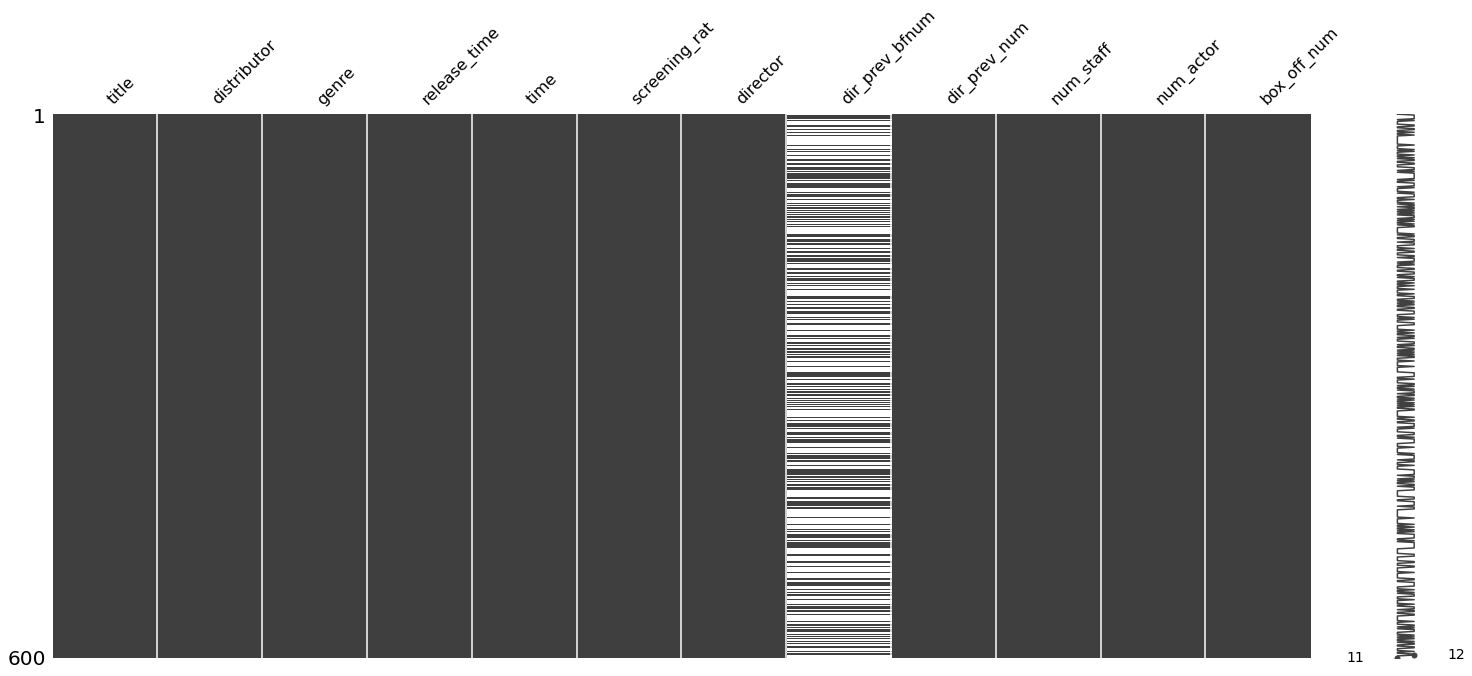

In [ ]:
import missingno as mn
mn.matrix(data)

In [ ]:
# 데이터의 통계 자료 확인하기: describe()
data.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [ ]:
# 특정 칼럼의 데이터 카테고리별 값 세기: value_counts(), 범주형 데이터에 주로 사용
data['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [ ]:
# groupby + 다른 집계 함수 설명.
data[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [ ]:
data['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [ ]:
data[['screening_rat', 'box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num')

,box_off_num
screening_rat,
전체 관람가,135100.5
청소년 관람불가,364181.3
12세 관람가,844980.9
15세 관람가,1247518.6


In [ ]:
data['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
data['director'].value_counts() 

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

## 시각화

-  seaborn 시각화 자료: https://seaborn.pydata.org/examples/index.html

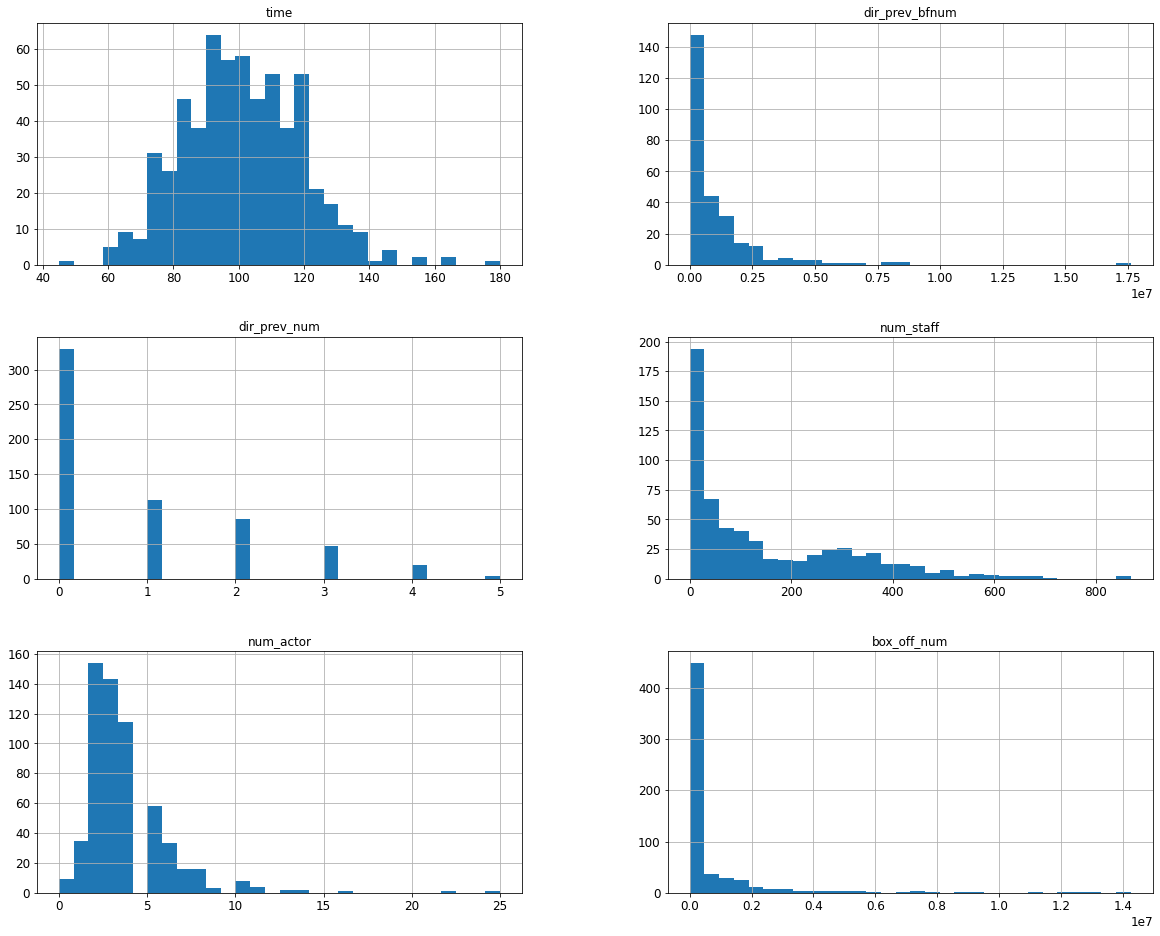

In [ ]:
data.hist(bins=30, figsize=(20,16))
plt.show()

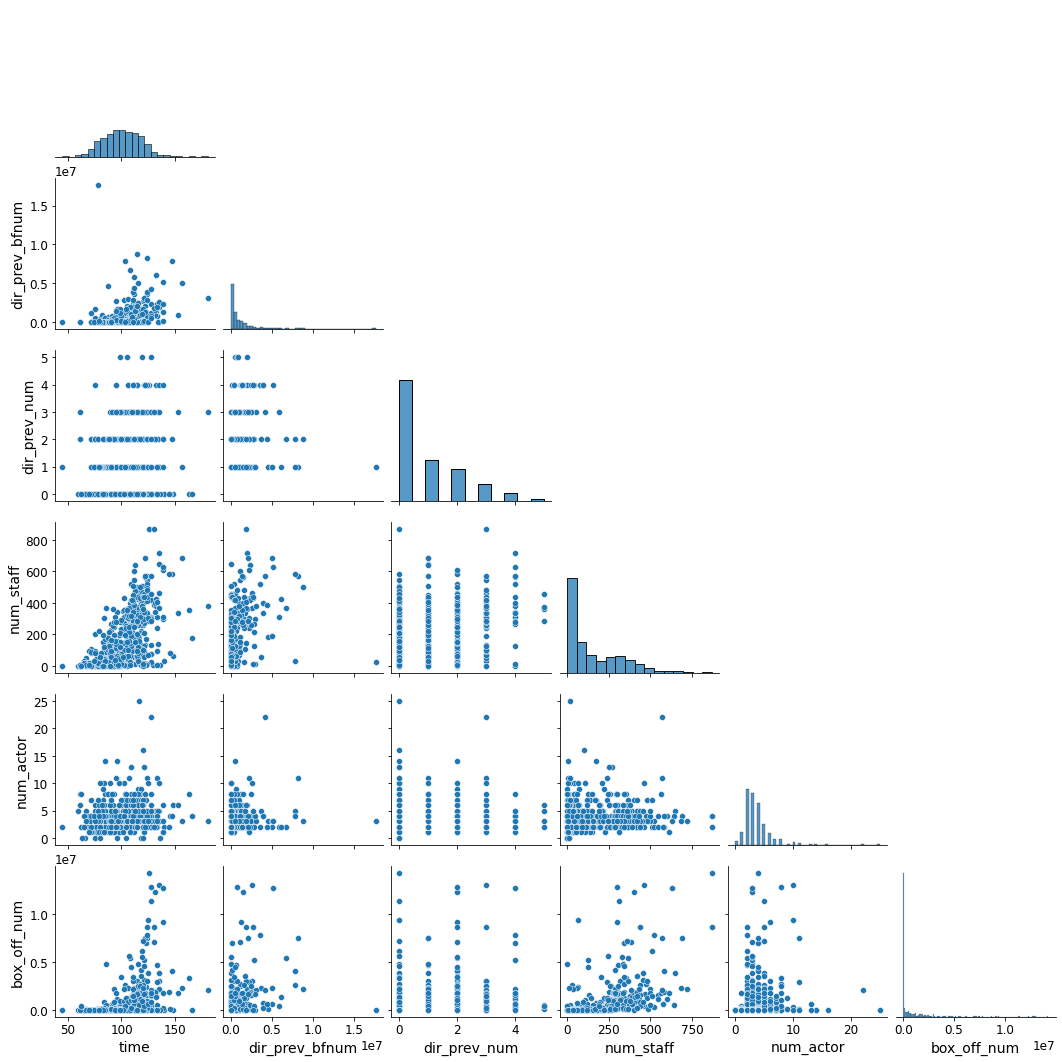

In [ ]:
# 산점도와 히스토그램을 같이 확인하고 싶을 때: pairplot(data, corner = True)
sns.pairplot(data, corner = True)

피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [ ]:
# 상관분석: 
corr_matrix = data.corr()
corr_matrix

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.0,0.3,0.3,0.6,0.1,0.4
dir_prev_bfnum,0.3,1.0,0.1,0.3,0.1,0.3
dir_prev_num,0.3,0.1,1.0,0.5,0.0,0.3
num_staff,0.6,0.3,0.5,1.0,0.1,0.5
num_actor,0.1,0.1,0.0,0.1,1.0,0.1
box_off_num,0.4,0.3,0.3,0.5,0.1,1.0


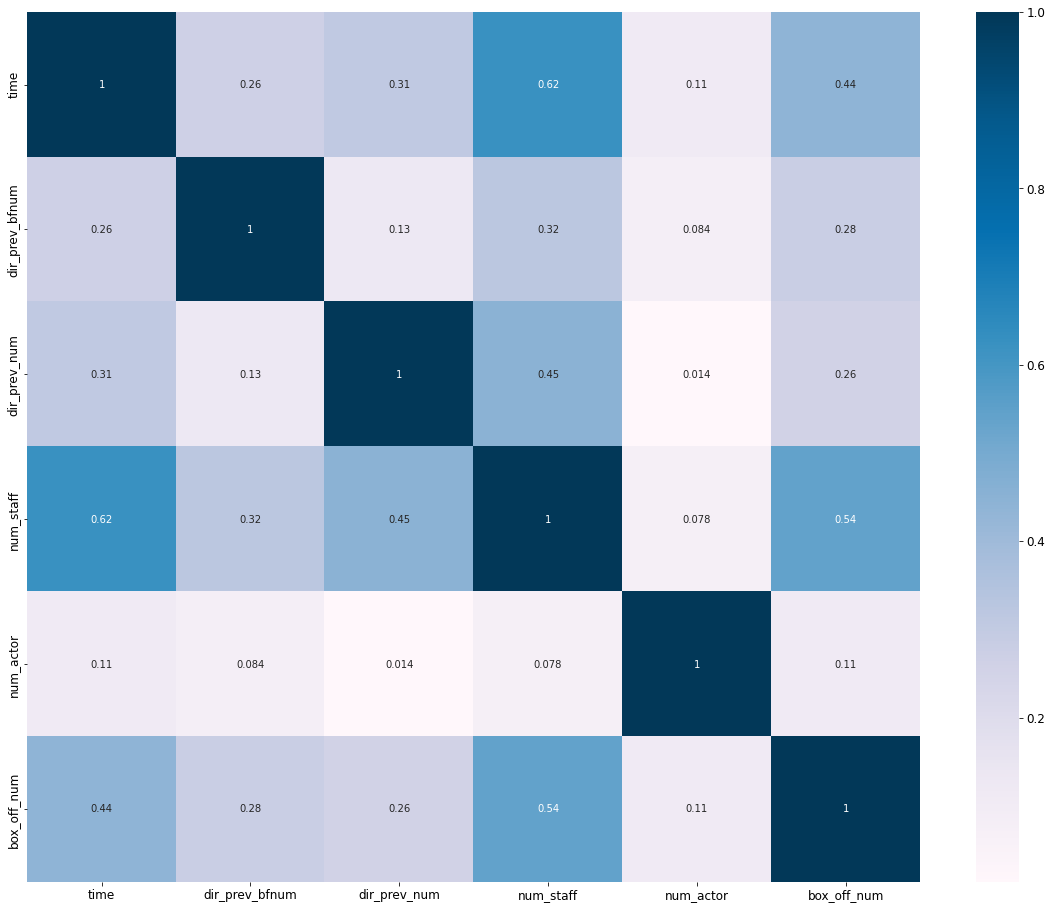

In [ ]:
# 상관분석의 시각화: 
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap='PuBu')

### 연도별 관객수 

In [ ]:
data['year'] = pd.to_datetime(data['release_time']).dt.year

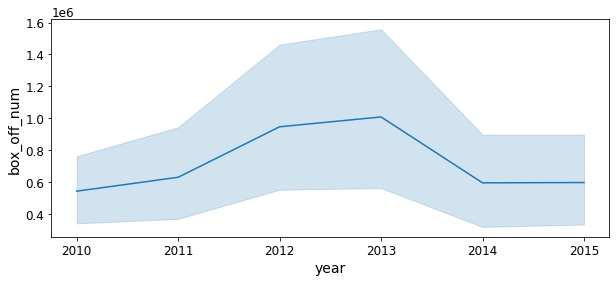

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot(data = data, x = 'year', y = 'box_off_num')

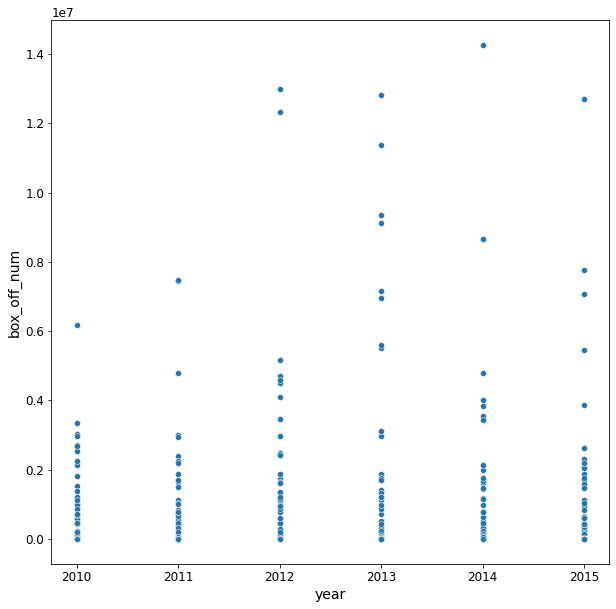

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = data, x = 'year', y = 'box_off_num')

In [ ]:
data[['year', 'box_off_num']].groupby('year').sum('box_off_num')

,box_off_num
year,
2010,48749235
2011,50309371
2012,83223817
2013,95698992
2014,75423331
2015,71504305


### 월별 관객수

In [ ]:
# datetime에서 월 데이터 추출하기: .month
data['month'] = pd.to_datetime(data['release_time']).dt.month

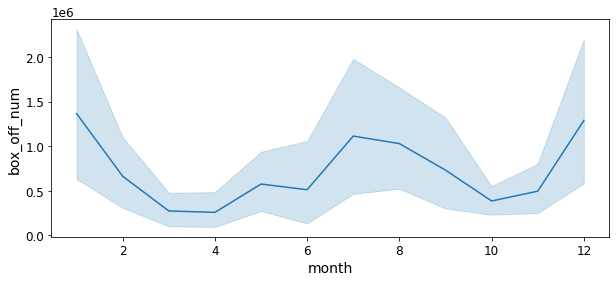

In [ ]:
plt.figure(figsize = (10,4))
#sns.lineplot
sns.lineplot(data = data, x = 'month', y = 'box_off_num')

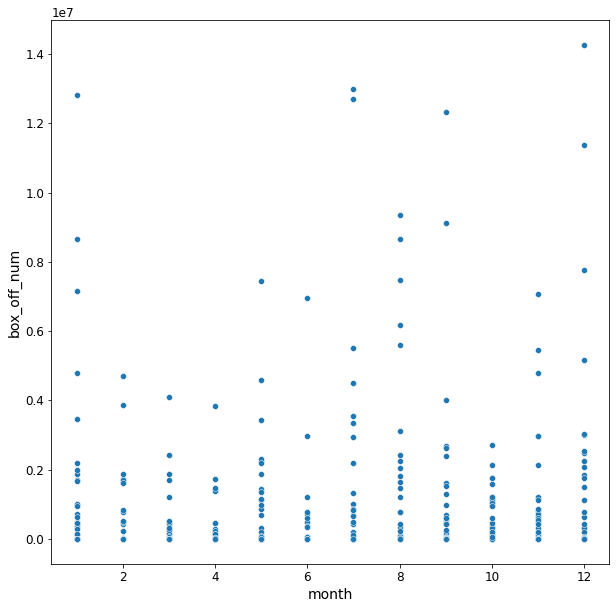

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = data, x = 'month', y = 'box_off_num')

In [ ]:
# 집계 함수 groupby
data[['month', 'box_off_num']].groupby('month').sum('box_off_num')

,box_off_num
month,
1,53271292
2,20553781
3,14242143
4,12133835
5,32814059
6,14856308
7,54576555
8,56603892
9,43891718


### 상영시간과 관객수 산점도

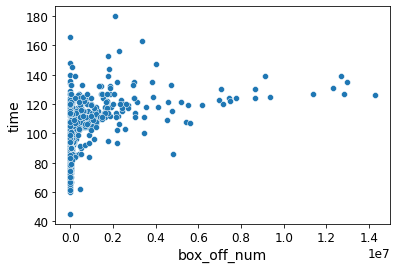

In [ ]:
sns.scatterplot(data = data, x='box_off_num', y = 'time')

#3. 전처리 및 정제

In [ ]:
#연속형 데이터를 범주형 데이터로 변경 pd.cut(data["특정 칼럼 이름"], bins=[구간], labels=[bins 구간별 레이블])
# 예제 data["income_cat"] = pd.cut(data["median_income"],= bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
#                               labels=[1, 2, 3, 4, 5])

#plt.figure(figsize=(12,8))
#plt.subplot(221)
#plt.hist(data["이전 변수"])

#plt.subplot(222)
#plt.hist(data["새로 생성한 변수"])
#plt.show()

In [ ]:
# 연속형 데이터 비교:  .value_counts()

In [ ]:
# 범주형 데이터 비교:  .value_counts()

##dir_prev_bfnum

In [ ]:
# 결측치 처리 확인
sample_incomplete_rows = data[data.isnull().any(axis=1)]
sample_incomplete_rows

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012,11
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526,2013,5
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778,2014,9
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868,2012,3
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132,2013,9
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958,2014,3
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,2010,9
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,2015,5


In [ ]:
pd.set_option('display.max_rows', None)
#pd.options.display.max_rows = 60

In [ ]:
sample_incomplete_rows[:20]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012,11
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526,2013,5
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778,2014,9
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868,2012,3
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745,2015,7
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079,2015,7
14,철가방 우수氏,CJ E&M 영화부문,드라마,2012-11-22,100,12세 관람가,윤학렬,NaN,0,152,1,92404,2012,11
15,자유의 언덕,(주) 영화제작전원사,드라마,2014-09-04,67,청소년 관람불가,홍상수,NaN,0,52,3,39317,2014,9
18,카트,리틀빅픽처스,드라마,2014-11-13,104,12세 관람가,부지영,NaN,0,359,4,814570,2014,11
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029,2010,5


In [ ]:
sample_incomplete_rows['dir_prev_num'].sum()

0

In [ ]:
data['dir_prev_bfnum'].fillna(0, inplace = True)
data[:10]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,2012,10
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.0,0,32,5,53526,2013,5
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.0,3,342,2,1110523,2012,10
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.0,0,3,5,4778,2014,9
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.0,0,138,3,868,2012,3


In [ ]:
data.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
year              0
month             0
dtype: int64

## distributor

In [ ]:
data

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,2012,10
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.0,0,32,5,53526,2013,5
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.0,3,342,2,1110523,2012,10
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.0,0,3,5,4778,2014,9
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.0,0,138,3,868,2012,3


In [ ]:
import re

data['distributor'] = data.distributor.str.replace("(주)", '')
data['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in data.distributor]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [ ]:
data['distributor'] = data['distributor'].apply(get_dis)

In [ ]:
data['distributor'].value_counts()

CJ                 68
롯데엔터테인먼트           52
NEW                38
마운틴픽처스             33
쇼박스                28
인디스토리              26
시네마달               18
골든타이드픽처스           15
케이알씨지              14
어뮤즈                10
시너지                10
영화사조제              10
영화사진진              10
키노아이               10
리틀빅픽처스              9
인디플러그               9
인벤트디                8
KTG상상마당             8
스폰지                 8
팝엔터테인먼트             6
필라멘트픽쳐스             6
무비꼴라쥬               6
BoXoo엔터테인먼트         6
시네마서비스              6
싸이더스                5
마인스                 5
메가박스                4
엣나인필름               4
드림팩트                4
나이너스엔터테인먼트          4
마노엔터테인먼트            4
씨너스엔터테인먼트           4
홀리가든                4
타임스토리그룹             3
이십세기폭스코리아           3
KT                  3
이모션픽처스              3
트리필름                3
씨네그루키다리이엔티          3
브릿지웍스               3
영화제작전원사             3
김기덕필름               3
노바엔터테인먼트            2
서울독립영화제             2
에스피엠                2
액티버스엔터테인먼트

In [ ]:
major_company = []
mid_sized_company = []
small_business = []

for index, row in pd.DataFrame(data['distributor'].value_counts()).iterrows():
  if (row.values >= 10 ):
    major_company.append(index)
  elif(row.values >= 2):
    mid_sized_company.append(index)
  else:
    small_business.append(index)

In [ ]:
encoding_distributor =[]
for index in data['distributor']:
  if any(index == x for x in major_company):
    print(index, 3)
    encoding_distributor.append(3)
  elif any(index == x for x in mid_sized_company):
    encoding_distributor.append(2)
    print(index, 2)
  else:
    encoding_distributor.append(1)
    print(index, 1)

In [ ]:
data['distributor'] = encoding_distributor
data['distributor']

0      3
1      3
2      3
3      3
4      3
5      3
6      2
7      3
8      1
9      1
10     3
11     1
12     3
13     1
14     3
15     2
16     3
17     3
18     2
19     2
20     3
21     3
22     2
23     3
24     2
25     1
26     3
27     3
28     3
29     2
30     2
31     2
32     3
33     3
34     3
35     3
36     1
37     2
38     3
39     3
40     3
41     3
42     1
43     2
44     3
45     3
46     3
47     3
48     3
49     2
50     3
51     2
52     2
53     1
54     3
55     3
56     2
57     3
58     3
59     3
60     2
61     1
62     1
63     3
64     3
65     3
66     3
67     3
68     3
69     2
70     3
71     3
72     1
73     3
74     3
75     3
76     3
77     2
78     3
79     3
80     3
81     3
82     1
83     3
84     3
85     3
86     3
87     2
88     1
89     1
90     3
91     3
92     3
93     1
94     2
95     2
96     2
97     3
98     3
99     3
100    2
101    3
102    3
103    2
104    3
105    3
106    1
107    3
108    3
109    2
110    3
1

In [ ]:
data[:10]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,3,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11
1,내부자들,3,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11
2,은밀하게 위대하게,3,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6
3,나는 공무원이다,3,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7
4,불량남녀,3,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11
5,강철대오 : 구국의 철가방,3,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,2012,10
6,길위에서,2,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.0,0,32,5,53526,2013,5
7,회사원,3,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.0,3,342,2,1110523,2012,10
8,"1789, 바스티유의 연인들",1,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.0,0,3,5,4778,2014,9
9,청춘그루브,1,드라마,2012-03-15,94,15세 관람가,변성현,0.0,0,138,3,868,2012,3


## genre

In [ ]:
data.groupby('genre')['box_off_num'].sum().sort_values()

genre
뮤지컬           33135
서스펜스         165222
애니메이션       3820460
다큐멘터리       6247020
미스터리        8968319
SF         23248494
공포         24814966
멜로/로맨스     33225507
느와르        61119768
액션         61711274
코미디        63277442
드라마       138277444
Name: box_off_num, dtype: int64

In [ ]:
data['genre_rank'] = data.genre.map({'뮤지컬' : 1, '서스펜스' : 2, '애니메이션' : 3, '다큐멘터리' : 4, '미스터리' : 5,
                                      'SF' : 6, '공포' : 7, '멜로/로맨스' : 8, '느와르' : 9, '액션' : 10, '코미디' : 11, '드라마' : 12})

In [ ]:
data['genre_rank'][:10]

0    10
1     9
2    10
3    11
4    11
5    11
6     4
7    10
8     1
9    12
Name: genre_rank, dtype: int64

In [ ]:
data.drop('genre', axis = 1, inplace = True)

##screening_rat

In [ ]:
data['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [ ]:
data[['screening_rat', 'box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num')

,box_off_num
screening_rat,
전체 관람가,135100.5
청소년 관람불가,364181.3
12세 관람가,844980.9
15세 관람가,1247518.6


In [ ]:
def OrdinalEncoder(screening):
  if (screening == "전체 관람가"):
    return 1
  elif(screening == "청소년 관람불가"):
    return 2
  elif(screening == "12세 관람가"):
    return 3
  elif(screening == "15세 관람가"):
    return 4
# OrdinalEncoder
screening_rat = []
for i in data['screening_rat']:
  screening_rat.append(OrdinalEncoder(i))

data['screening_rat'] = screening_rat

In [ ]:
data[:10]

,title,distributor,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,genre_rank
0,개들의 전쟁,3,2012-11-22,96,2,조병옥,0.0,0,91,2,23398,2012,11,10
1,내부자들,3,2015-11-19,130,2,우민호,1161602.5,2,387,3,7072501,2015,11,9
2,은밀하게 위대하게,3,2013-06-05,123,4,장철수,220775.2,4,343,4,6959083,2013,6,10
3,나는 공무원이다,3,2012-07-12,101,1,구자홍,23894.0,2,20,6,217866,2012,7,11
4,불량남녀,3,2010-11-04,108,4,신근호,1.0,1,251,2,483387,2010,11,11
5,강철대오 : 구국의 철가방,3,2012-10-25,113,4,육상효,837969.0,2,262,4,233211,2012,10,11
6,길위에서,2,2013-05-23,104,1,이창재,0.0,0,32,5,53526,2013,5,4
7,회사원,3,2012-10-11,96,2,임상윤,739522.0,3,342,2,1110523,2012,10,10
8,"1789, 바스티유의 연인들",1,2014-09-18,129,1,정성복,0.0,0,3,5,4778,2014,9,1
9,청춘그루브,1,2012-03-15,94,4,변성현,0.0,0,138,3,868,2012,3,12


In [ ]:
columnName = ['title','release_time','director', 'year']

In [ ]:
data[:2]

,title,distributor,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,genre_rank
0,개들의 전쟁,3,2012-11-22,96,2,조병옥,0.0,0,91,2,23398,2012,11,10
1,내부자들,3,2015-11-19,130,2,우민호,1161602.5,2,387,3,7072501,2015,11,9


In [ ]:
data.drop(columnName, axis = 1, inplace = True)

In [ ]:
data[:10]

,distributor,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_rank
0,3,96,1,0.0,0,91,2,23398,10
1,3,130,1,1161602.5,2,387,3,7072501,9
2,3,123,2,220775.2,4,343,4,6959083,10
3,3,101,4,23894.0,2,20,6,217866,11
4,3,108,2,1.0,1,251,2,483387,11
5,3,113,2,837969.0,2,262,4,233211,11
6,2,104,4,0.0,0,32,5,53526,4
7,3,96,1,739522.0,3,342,2,1110523,10
8,1,129,4,0.0,0,3,5,4778,1
9,1,94,2,0.0,0,138,3,868,12


인코딩 관련
- 블로그: https://techblog-history-younghunjo1.tistory.com/99
- 캐글: https://www.kaggle.com/code/residentmario/encoding-categorical-data-in-sklearn/notebook

In [ ]:
#OrdinalEncoder vs OnehotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 인코딩
# !pip install category_encoders 

# import category_encoders as ce
# data_genre = ce.BinaryEncoder().fit_transform(data['genre'])
# data_genre.head()

# data2 = pd.concat([data, data_genre], axis = 1)
# data2.drop('genre', axis = 1,  inplace = True)
# data2

In [ ]:
# 데이터 변환 => 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data) 

#scaler = MinMaxScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data)

#data = pd.DataFrame(data_scaled, columns=data.feature_names) 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop("box_off_num", axis=1), data["box_off_num"].copy() , test_size=0.2, random_state=42)
X_train[:10]

,distributor,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month,genre_rank
145,2,96,2,0.0,0,82,5,11,3
9,1,94,4,0.0,0,138,3,3,12
375,3,76,1,0.0,0,3,2,2,4
523,2,80,2,0.0,0,57,3,9,12
188,3,83,2,0.0,0,151,2,7,10
131,3,104,2,0.0,0,119,2,9,12
572,3,97,4,0.0,0,51,3,10,12
298,2,126,4,481722.8,4,287,3,6,12
586,2,83,3,0.0,0,2,4,12,12
446,3,112,3,0.0,0,547,2,12,8


#4. 모델링 및 훈련

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
features = [ 'distributor', 'time', 'screening_rat', 'dir_prev_bfnum', 'dir_prev_num']
X2_train = X_train[features]
X2_test = X_test[features]

forest_reg2 = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg2.fit(X2_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# MSE, RMSE를 사용한 결과 비교
from sklearn.metrics import mean_squared_error

def modelOutput(model, modelName, test):
  data_predictions = model.predict(test)
  mse = mean_squared_error(y_test, data_predictions)
  tree_reg_rmse = np.sqrt(mse)
  print(f"{modelName} 결과: {tree_reg_rmse}")

modelOutput(forest_reg, "RandomForestRegressor", X_test)

RandomForestRegressor 결과: 1320791.6665674346


In [ ]:
modelOutput(forest_reg2, "RandomForestRegressor2", X2_test)

RandomForestRegressor2 결과: 1608001.050853402


In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [1185062.93102983 1438328.04261678 1982516.58610912 1565549.05404485
 1711380.71317717]
평균: 1576567.4653955516
표준 편차: 266637.0732712816


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# 가장 성능이 좋은 모델의 파라미터
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
# 테스트를 거친 모델의 성능과 하이퍼 파라미터 값
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1708361.3099303455 {'max_features': 2, 'n_estimators': 3}
1502824.3440594273 {'max_features': 2, 'n_estimators': 10}
1502420.676248026 {'max_features': 2, 'n_estimators': 30}
1822570.3378925319 {'max_features': 4, 'n_estimators': 3}
1641583.1055598827 {'max_features': 4, 'n_estimators': 10}
1580246.3319289195 {'max_features': 4, 'n_estimators': 30}
1796429.656348918 {'max_features': 6, 'n_estimators': 3}
1666317.8098502278 {'max_features': 6, 'n_estimators': 10}
1586445.1261260149 {'max_features': 6, 'n_estimators': 30}
1955001.399740674 {'max_features': 8, 'n_estimators': 3}
1697201.628131353 {'max_features': 8, 'n_estimators': 10}
1652547.3269796541 {'max_features': 8, 'n_estimators': 30}
1717549.4648978533 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1598315.094727532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1790097.2292213882 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1678693.0179838524 {'bootstrap': False, 'max_features': 3, 'n_esti

In [ ]:
# 전체 결과 데이터를 데이터프레임을 사용하여 확인, cv_results_
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0,0.0,0.0,0.0,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-2262638505790.1,-2116055433404.6,...,-2918498365266.9,826462729740.0,11,-819290500686.5,-743086917414.6,-919179133809.0,-1018943922605.2,-861241140481.1,-872348322999.3,93091790884.8
1,0.0,0.0,0.0,0.0,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1585501077612.5,-1559387599270.5,...,-2258481009097.6,668352088200.8,2,-415229901653.3,-447505352372.6,-462060963095.3,-512971548511.2,-412427345155.3,-450039022157.5,36709024876.6
2,0.0,0.0,0.0,0.0,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1212443323177.9,-1442657088422.1,...,-2257267888417.6,833722116903.4,1,-400297886648.0,-362534919658.4,-350231722067.1,-340232216342.6,-336385856201.8,-357936520183.6,23034183523.7
3,0.0,0.0,0.0,0.0,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-2998214061252.7,-2918201919318.8,...,-3321762636565.7,1103623206756.1,16,-596793455611.2,-804224979766.3,-820609881087.4,-845153243675.0,-1195072762401.4,-852370864508.3,192947289742.1
4,0.0,0.0,0.0,0.0,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1621729886173.0,-1828387153702.5,...,-2694795092459.6,1007995802909.9,6,-413766396770.2,-394514309171.5,-451560270779.9,-509376029955.4,-606420771032.7,-475127555541.9,76459101015.9
5,0.1,0.0,0.0,0.0,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1388076688168.1,-1664107726782.7,...,-2497178469574.8,848273311010.2,3,-408988638437.3,-361088671869.7,-379263483203.6,-376899342245.5,-400510590012.4,-385350145153.7,17237749635.2
6,0.0,0.0,0.0,0.0,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2010851192297.9,-3982443934894.8,...,-3227159510209.9,1298507003770.7,15,-759914648292.1,-1103409233625.9,-968541226202.5,-1148256184698.5,-1343579120212.5,-1064740082606.3,194110389634.7
7,0.0,0.0,0.0,0.0,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1659354460522.1,-2204790609976.3,...,-2776615043424.1,1035398210620.7,8,-463492613532.0,-481014455589.4,-436391653271.6,-579318735520.5,-494715737734.2,-490986639129.5,48275136039.5
8,0.1,0.0,0.0,0.0,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1556293389338.3,-1840497702129.1,...,-2516808138209.0,820896708298.9,4,-457913746160.1,-376131873245.7,-336256110371.3,-436292122510.7,-396349558523.2,-400588682162.2,43164068575.4
9,0.0,0.0,0.0,0.0,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2471126460985.8,-5200757290799.2,...,-3822030472988.0,1152994586766.6,18,-719438610212.0,-940996640792.4,-934884029671.5,-1090344283006.9,-1032115297157.2,-943555772168.0,126253639104.1


In [ ]:
estimator = grid_search.best_estimator_

In [ ]:
data_predictions = estimator.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, data_predictions)
print(f"결과: {np.sqrt(mse)}")

결과: 1386693.012845357


##결과 시각화

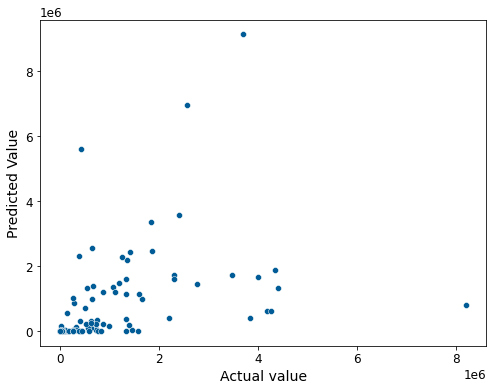

In [ ]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x= data_predictions, y= y_test, color= '#005b96')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.show()

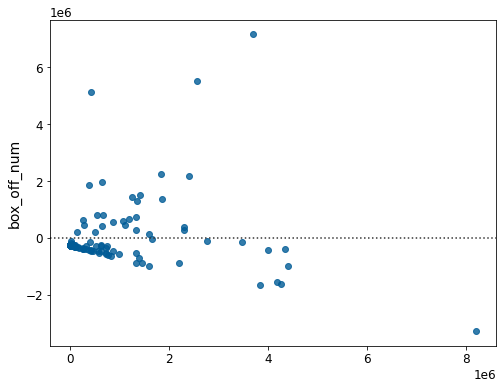

In [ ]:
plt.figure(figsize= (8, 6))
sns.residplot(x= data_predictions, y = y_test, color= '#005b96')
plt.show()

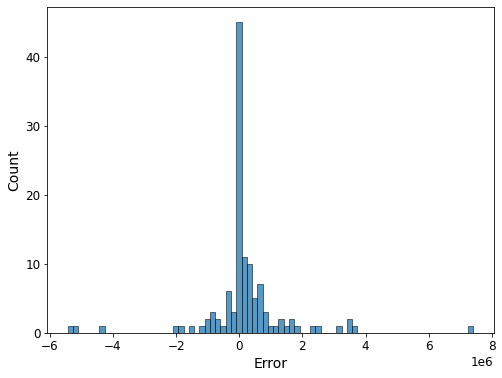

In [ ]:
resid = data_predictions - y_test
plt.figure(figsize= (8, 6))
sns.histplot(resid)
plt.xlabel('Error');

In [ ]:
# 이산형 데이터의 경우 히스토그램으로 표현

#6. 배포

In [ ]:
#my_model = model or piplineModel

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF